In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read,write
import math

In [2]:
def calculateEnergy(wave_data):
    enerygy = []
    sum = 0
    for i in range(len(wave_data)):
        sum = sum + (int(wave_data[i]) * int(wave_data[i]))
        if (i+1) % 256 == 0:
            enerygy.append(sum)
            sum = 0
        elif i == len(wave_data)-1:
            enerygy.append(sum)
    return enerygy

C:\Users\GF LAB\AppData\Local\Temp\ipykernel_13456\341696367.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data,dtype=np.short)


Number of sample Points:314074


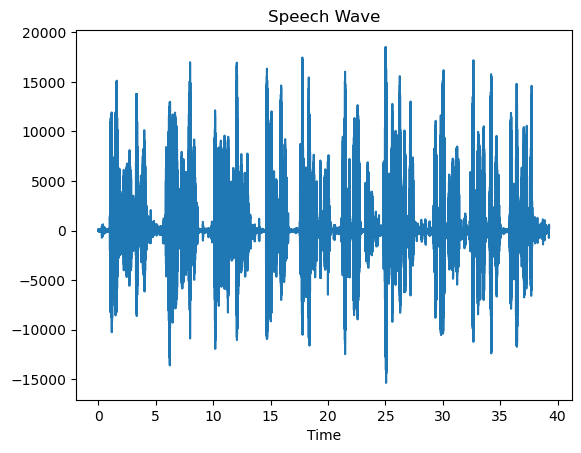

In [3]:
f = wave.open("../dataset/auds/sample1.wav","rb")
params = f.getparams()
nchannels, samplewidth, framerate, nframes = params[:4]
str_data = f.readframes(nframes=nframes)
str_data = np.frombuffer(str_data,dtype="int16")
f_rate = f.getframerate()
wave_data = np.fromstring(str_data,dtype=np.short)
print("Number of sample Points:"+str(len(wave_data)))

time = np.linspace(0,len(str_data)/f_rate, num=len(str_data)) 

plt.figure(1)
plt.title("Speech Wave")
plt.xlabel("Time")
plt.plot(time,str_data)
plt.show()

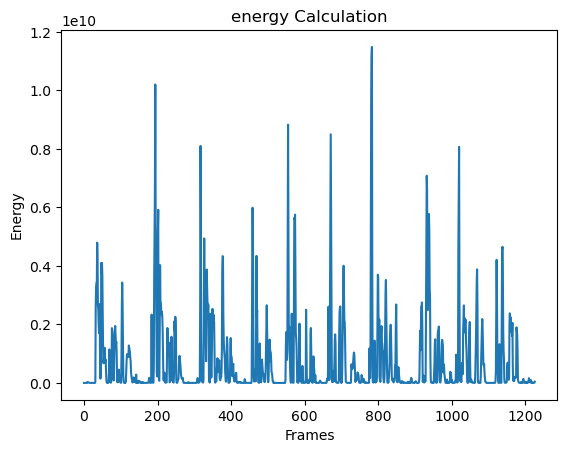

In [4]:
energy = calculateEnergy(wave_data)

plt.figure()
plt.plot(energy)
plt.axis("tight")
plt.xlabel("Frames")
plt.ylabel("Energy")
plt.title("energy Calculation")
plt.show()

In [5]:
def processFrames(frames,Fs):
    freq = max(frames)
    return freq

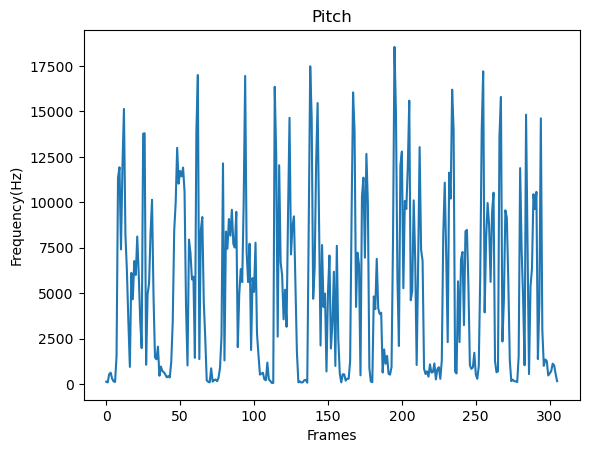

In [7]:
FRAME_SIZE = 1024

Fs,data = read("../dataset/auds/sample1.wav")
numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i+1) * FRAME_SIZE]
    frequencies[i] = processFrames(frame.astype(float),Fs)

plt.figure()
plt.plot(frequencies)
plt.axis("tight")
plt.xlabel("Frames")
plt.ylabel("Frequency(Hz)")
plt.title("Pitch")
plt.show()

In [8]:
def zeroCR(wave_data,frame_size,overlap):
    wlen = len(wave_data)
    step = frame_size - overlap
    frame_num = math.ceil(wlen / step)
    zcr = np.zeros((frame_num,1))
    for i in range(frame_num):
        curFrame = wave_data[np.arange(i*step,min(i*step+frame_size,wlen))]
        curFrame = curFrame - np.mean(curFrame)
        zcr[i] = sum(curFrame[0:-1] * curFrame[1::]<=0)
    return zcr

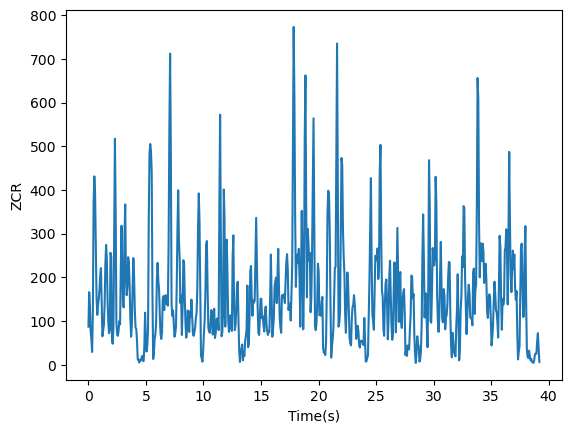

In [11]:
overlap = 512
wave_data.shape = -1,1
zcr = zeroCR(wave_data,FRAME_SIZE,overlap)

time2 = np.arange(0,len(zcr)) * (len(wave_data) / len(zcr) / f_rate)

plt.plot(time2,zcr)
plt.ylabel("ZCR")
plt.xlabel("Time(s)")
plt.show()

f.close()